**Import the statistics tools and scrap S&P 500 Data**

Data from 2010 to 2019 (bull market) is scrapped.

r = return of the period<br>
num_up = Number of travel from trough to peak<br>
num_down = Number of travel from peak to trough<br>
a_s = Average ascent speed<br>
d_s = Average descent speed<br>

In [ ]:
%run -i 'Regression Functions.ipynb'
%run -i 'Scrap Data.ipynb'

**Regress return on ascent speed**<br>

${r} = {b_{0}} + {b_{1}} {a}$_${s} + {\epsilon}$ <br>

Though both ${b_{0}}$ and ${b_{1}}$ are significant, the explanatory power is quite low (0.055).

There is no serial correlation among residuals as DW value is close to 2.0

The p-value for Breuschpagan test is smaller than 5%, which means residuals is heteroscedastic.

The next step is to handle heteroscedasticity.

In [9]:
r        = np.array(data_set)[:,1:2].astype(np.float)  
num_up   = np.array(data_set)[:,2:3].astype(np.float)
num_down = np.array(data_set)[:,3:4].astype(np.float)
a_s      = np.array(data_set)[:,4:5].astype(np.float) 
d_s      = np.array(data_set)[:,5:6].astype(np.float)

linreg(a_s,r).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     30.15
Date:                Tue, 05 May 2020   Prob (F-statistic):           6.37e-08
Time:                        22:18:06   Log-Likelihood:                -1380.6
No. Observations:                 500   AIC:                             2765.
Df Residuals:                     498   BIC:                             2774.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1961      0.207     15.434      0.000       2.789       3.603
x1             2.8491      0.519      5.491      0.000       1.830       3.869
==============================================================================
Omnibus:                      409.059   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10511.234
Skew:                           3.385   Prob(JB):                         0.00
Kurtosis:                      24.417   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BP test p-val:  0.002311979745616131 . Using threshold 5%, the residual is heteroscedastic


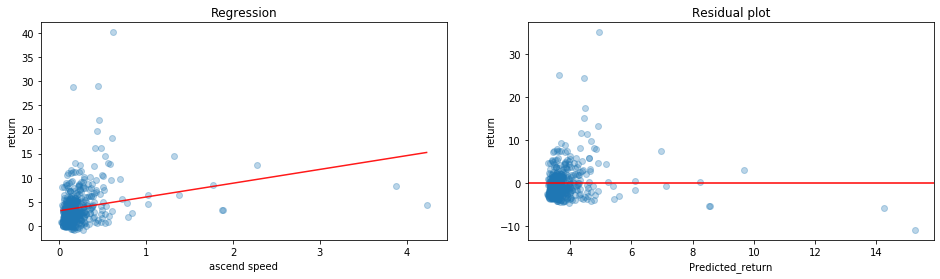

<Figure size 3600x3600 with 0 Axes>

In [3]:
bp_test(linreg(a_s,r))
reg_resid_plot(linreg(a_s,r),a_s,r,'ascend speed','return')

**Tackle Heteroscedasticity**

When looking at the distribution of return and speed, they are both positively skewed.

To handle heteroscedasticity, the dependent variable, return, is log-transformed.

From the regression plot above, the independent variable, speed, is very concentrated between 0 to 0.5.

Therefore, the independent variable, speed, will be log transformed in order to make it more interpretable.

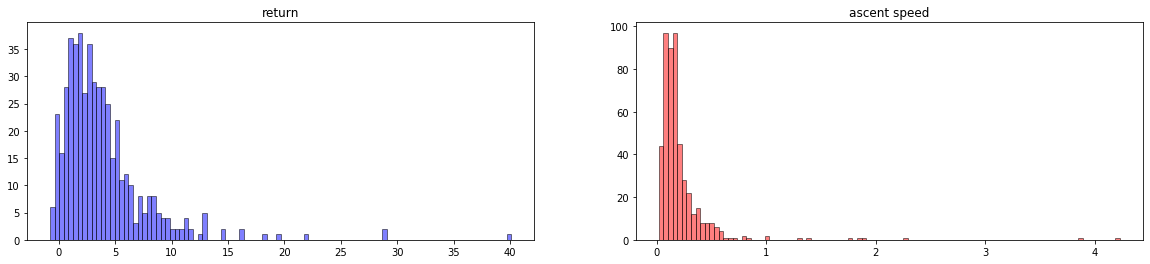

<Figure size 3600x3600 with 0 Axes>

In [4]:
f,a = plt.subplots(1,2)
plt.figure(figsize=(50,50))

a[0].hist(r, color = 'blue', edgecolor = 'black',bins = int(100),alpha=0.5)
a[1].hist(a_s, color = 'red', edgecolor = 'black',bins = int(100),alpha=0.5)
a[0].set_title('return')
a[1].set_title('ascent speed')

f.set_figheight(4)
f.set_figwidth(20)

**The distributions of both variables looks normal after log-transformed.**

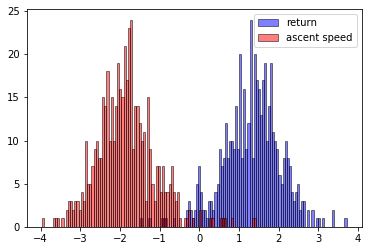

In [5]:
log_r = np.log(1+r)
log_a_s = np.log(a_s)

plt.hist(log_r, color = 'blue', edgecolor = 'black',bins = int(100), alpha=0.5, label='return')
plt.hist(log_a_s, color = 'red', edgecolor = 'black',bins = int(100), alpha=0.5, label='ascent speed')
plt.legend(loc='upper right')
plt.show()

**Regression after transformation**

${log (1+r)}$  = ${b_{0}} + {b_{1}}$ $log ({a}$_${s}$) + ${\epsilon}$ <br>

The explantory increased a bit, from 0.05 to 0.1. Still a lot of unexplained noise.

And the Breuschpagan test shows that resiudal is not heteroscedastic after transformation.

In [6]:
linreg(log_a_s,log_r).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     56.75
Date:                Tue, 05 May 2020   Prob (F-statistic):           2.34e-13
Time:                        22:17:39   Log-Likelihood:                -522.56
No. Observations:                 500   AIC:                             1049.
Df Residuals:                     498   BIC:                             1058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9021      0.083     23.003      0.000       1.740       2.065
x1             0.3128      0.042      7.534      0.000       0.231       0.394
==============================================================================
Omnibus:                       34.431   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.589
Skew:                          -0.533   Prob(JB):                     2.81e-11
Kurtosis:                       4.094   Cond. No.                         6.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BP test p-val:  0.2203588558975492 . Using threshold 5%, the residual is not heteroscedastic


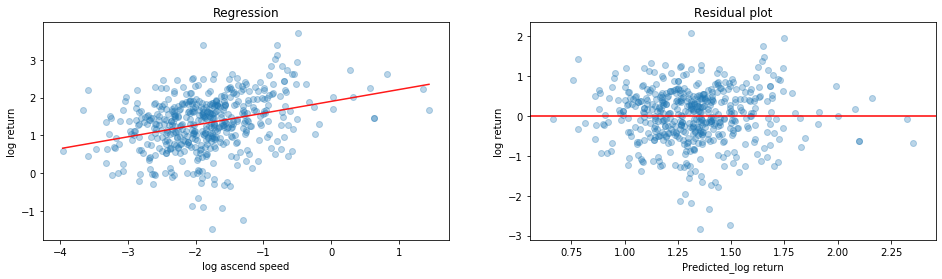

<Figure size 3600x3600 with 0 Axes>

In [7]:
reg_resid_plot(linreg(log_a_s,log_r),log_a_s,log_r,'log ascend speed','log return')
bp_test(linreg(log_a_s,log_r))

**Multiple Regression**

Now we try to incorporate all the variables we scrapped, into the regression model.

${log (1+r)}  = {b_{0}} + {b_{1}}$ $({num}$ _ ${up}$ - ${num}$ _ ${down})$ + $log (-{a}$_${s} / {d}$_${s} )$

Now the model has higher explanatory power (0.492).

Except that Breuschpagan and White test give contradictory results on heteroscedasticity.

But when looking at the reisdual plot and residual distribution, the residuals look fine.

Both independent variable's variance_inflation_factor are smaller than 5, which means there is no multicolinearity.

**Conclusion**

During bull market, the stock return can be modeled by its speed and difference of numbers of up & downs, though the model cannot fully explain the return due to noise or other factors that has not been considered.

In [10]:
new_x = np.concatenate((num_up-num_down,np.log(-a_s/d_s)),axis=1)
linreg(new_x,log_r).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     236.1
Date:                Tue, 05 May 2020   Prob (F-statistic):           8.52e-73
Time:                        22:18:09   Log-Likelihood:                -382.59
No. Observations:                 500   AIC:                             771.2
Df Residuals:                     497   BIC:                             783.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6895      0.046     14.989      0.000       0.599       0.780
x1             0.0580      0.003     20.931      0.000       0.053       0.063
x2             1.3762      0.127     10.869      0.000       1.127       1.625
==============================================================================
Omnibus:                       18.812   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.666
Skew:                           0.237   Prob(JB):                     4.89e-08
Kurtosis:                       4.180   Cond. No.                         91.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

White test p-val:  0.05642260771743522 . Using threshold 5%, the residual is not heteroscedastic
BP test p-val:  0.007331927288555013 . Using threshold 5%, the residual is heteroscedastic


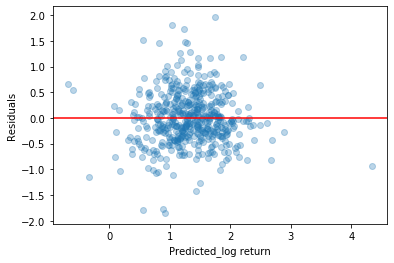

In [11]:
resid_plot(linreg(new_x,log_r),'log return')
white_test(linreg(new_x,log_r))
bp_test(linreg(new_x,log_r))

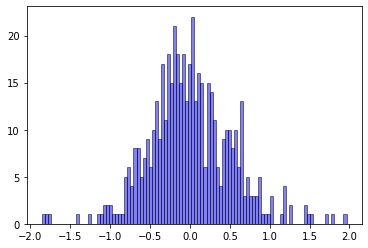

In [12]:
plt.hist(linreg(new_x,log_r).resid, color = 'blue', edgecolor = 'black',bins = int(100), alpha=0.5, label='return')
plt.show()

In [13]:
(smo.variance_inflation_factor(new_x, 0) <5) & (smo.variance_inflation_factor(new_x, 1)<5)

True